
## Wright-Fisher and Moran Models for Genetic Drift

In [4]:
import random
import numpy as np
from matplotlib import pyplot as plt

## Wright-Fisher Model

### Assumptions of the basic model:

* generations are non-overlapping: all individuals reproduce and die simultaneously
* the population is characterized by the current numbers of each allelic type
* new generations are formed by binomial sampling of alleles from the parental generation. Stated another way, offspring genoypes are randomly sampled from parental genotypes, with probabilities equal to the frequency of each genotype in the parental generation (i.e. fair sampling)




![Wright-Fisher Model from Muirhead 2016](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/images/wright-fisher-model-from-muirhead-2016.png)


### Implement a function to simulate the Wright-Fisher model

Write a function that implements the Wright-Fisher model.  

* Your function should take 3 arguments:
    - `x` the initial number of mutant allele in the population
    - `N` the population size
    - `ngens` the number of generations to simulate

* Your function should return a list that gives the number of mutant alleles in the population for each generation of the simulation

* There are two straightforward ways to simulate binomial sampling, illustrated below

#### Binomial sampling using `random.choices`

In [5]:
# simulating binomial sampling using the random.choices function

# randomly choose between 0 (wt) and 1 (mt), with probabilities given by "weights", returning k such choices
# evaluate this multiple times to see that it changes each time
sample = random.choices([0,1], weights=[0.7, 0.3], k = 10 )
sample

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [7]:
sample.count(1), sample.count(0)  # count the number of mutant (1) and wild-type (0) alleles

(2, 8)

#### Binomial sampling using `numpy.random.binomial`

In [13]:
# Simulating binomial sampling using np.random.binomial

# get count of mutant alleles in 10 random draws where the probability of 
# picking the mutant allele is 0.3
# evaluate this multiple times to see that it changes each time
mut_ct = np.random.binomial(10, 0.3)
mut_ct

2

#### Your implementation of Wright-Fisher

In [17]:
def wright_fisher(x, N, ngens):
    pass # replace this with your code

#### Explore Wright-Fisher model for different parameters

Generate 100 runs of your simulation for all the combinations of following parameters:

* Population sizes:  10, 50, 100, 1000
* Initial allele freqencies: 1/N, 0.5 (more akin to a migration event rather than mutation)
* ngens: 500

For each set of 100 runs:

* Draw plots of frequency of the mutant allele over time (note: it might be useful to "zoom in" on some of the plots, drawing only a portion of the generations (e.g. 100 generations vs the full 500) in order to compare the dynamics)

* Calculate for what fraction of the runs did the mutant allele become fixed




In [15]:
## your code here

### Predictions of Wright-Fisher model

A new mutation appears is introduced at a fraction $p$ into population of size $N$. The Wright-Fisher model predics:

* Expected allele frequencies ($E(p) = p$) remain constant across generations, whereas the variance per generation is $Var[p] = \frac{p (1-p)}{N}$ 

* Over time, allele frequency trajectories in replicate populations diverge from each other, and the variance in allele frequency between them increases

* A new mutation introduced into a population eventually becomes takes over the population (becomes "fixed") or is lost -- the probability of fixation at any time point $t$ is equal to its frequency in the population at thtat time ($p_t$).

* Given initial allele frequency $p$, the expected time before a neutral mutation is either fixed or lost from the population is approximately $ 2N (p \log p + (1-p) \log(1-p))$



## Moran Model

The Moran model is an alternate model that is used to explore neutral evolution in populations. The assumptions of the Moran model are (from Muirhead 2016):

* In the Moran model generations overlap.
* The Moran model does not specify discrete generations for the population as a whole; instead, it follows the fate of individual allele copies in ‘timesteps.’ 
* Each timestep involves the death of an allele copy and the reproduction (exact duplication) of an allele copy to replace the one that died (see figure below)
* The mathematical description of the process is further simplified by assuming that the two events (death and reproduction) are simultaneous, so that an allele probability of being chosen for reproduction does not depend upon whether or not it was chosen for death.

![Moran Model from Muirhead 2016](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/images/moran-model-from-muirhead-2016.png)

### Implementation of Moran model

In [18]:
def moran(x, N, ngens):
    nmut = [x]
    for gen in range(ngens):
        for i in range(N):
            p = nmut[-1]/N
            died, born = random.choices([0,1], weights=(1-p, p),k=2)
            nmut.append(nmut[-1] + (born - died))
    return nmut
            

(0.0, 1.0)

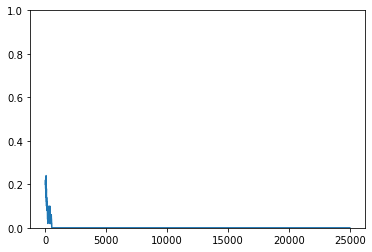

In [24]:
# generate one instance of moran model
# initial mutant count = 10, popn size = 50, ngens = 500

ct0 = 10
popsize = 50
ngens = 500

nmuts = np.array(moran(ct0, popsize, ngens))  
plt.plot(nmuts/popsize)  # turn counts into frequences

plt.ylim(0,1)

In [28]:
# generate 100 instances of moran model
# initial mutant count = 10, popn size = 50, ngens = 500

ct0 = 10
popsize = 50
ngens = 500

runs = [moran(ct0, popsize, ngens) for i in range(100)]
runs = np.array(runs)


(0.0, 7500.0)

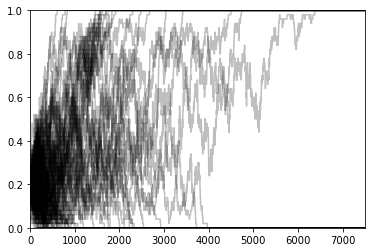

In [29]:
for run in runs:
    plt.plot(run/popsize, alpha=0.25, color='black')  # turn counts into frequences

plt.ylim(0,1)
plt.xlim(0,7500)

In [33]:
# calculate the fraction of runs in which the mutant allele became fixed

freqs = runs/popsize
final_freq = freqs[:,-1]
np.sum(final_freq == 1)/len(final_freq)

0.21

### Predictions of Moran model

* Probability of fixation: $p_0$
* After one generation, variance in $p$ is: $\frac{2p(1-p)}{(2N)^2}$